<h1 style='color:blue;font-size:18px;text-align: center;'>CAPSTONE PROJECT<h1><h2 style='color:blue;font-size:18px;;text-align: center;'> PREDICTING  PGA TOUR PLAYER'S CHANCE TO  WIN  A PGA TOUR TOURNAMENT<h2>

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pylab as pl

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score
from sklearn import set_config
set_config(display="diagram")

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score,precision_recall_curve, roc_curve,confusion_matrix,accuracy_score, recall_score, precision_score,plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

from google.cloud import storage
# WARNING; WORKAROUND to prevent timeout for files > 6 MB on 800 kbps upload link.
storage.blob._DEFAULT_CHUNKSIZE = 5 * 1024* 1024  # 20 MB
storage.blob._MAX_MULTIPART_SIZE = 5 * 1024* 1024  # 20 MB


import warnings
warnings.filterwarnings('ignore')

<h5 style='color:blue;font-size:18px'>Web Scrapping to get Data Input</h5>

<p>The data input containing the relevant statistics for each PGA player who has competed in PGA tournaments from 
2011-2021 is located in the website: https://www.pgatour.com/stats.html. As a result, it was necessary Web 
Scrapping to get the data, and built the database iteratively.</p>

<h6 style='color:red;font-size:14px'>Generate different arrays related to the PGA tour's statistics that will facilitate the web scrapping in the 
aforementioned website</h6>

In [ ]:
score_1=['/stats/stat.120','/stats/stat.120','/stats/stat.120','/stats/stat.103','/stats/stat.101','/stats/stat.02401',
        '/stats/stat.02402','/stats/stat.02405','/stats/stat.02409','/stats/stat.02567','/stats/stat.02569',
        '/stats/stat.02568','/stats/stat.02564','/stats/stat.02564','/stats/stat.02674','/stats/stat.02674',
         '/stats/stat.02674','/stats/stat.02674','/stats/stat.02435','/stats/stat.111','/stats/stat.213','/stats/stat.01008','/stats/stat.02419','/stats/stat.156',
        '/stats/stat.419','/stats/stat.130','/stats/stat.104']
score_2=['Scoring','Scoring','Scoring','G','D','C','B','S','C','S','SG','SG','SG','SG','SG','SG','SG','SG','R','Sand',
        'H','F','Bogey Average','Birdie Average','Going','Scra','Putting Av']
score_3=['0','0','0','1','0','0','1','3','1','1','3','2','4','4','0','0','0','0','0','0','0','0','0','0','0','0','0']
score_4=['Scoring Average','Scoring Average','Scoring Average','Greens in Regulation Percentage','Driving Distance',
        'Club Head Speed','Ball Speed','Spin Rate','Carry Distance','SG: Off-the-Tee','SG: Around-the-Green',
        'SG: Approach the Green','SG: Putting','SG: Putting','SG: Tee-to-Green','SG: Tee-to-Green','SG: Tee-to-Green',
         'SG: Tee-to-Green','Rough Tendency','Sand Save Percentage','Hit Fairway Percentage','Fairway Bunker Tendency',
        'Bogey Average','Birdie Average','Going for the Green','Scrambling','Putting Average']
score_5=['AVG','TOTAL ROUNDS','TOTAL STROKES','%','AVG.','AVG.','AVG.','AVG.','AVG.','TOTAL SG:OTT','TOTAL SG:ARG',
        'TOTAL SG:APP','AVERAGE','TOTAL SG:PUTTING','AVERAGE','SG:OTT','SG:APR','SG:ARG','%','%','%','%',
         'AVERAGE BOGEYS PER ROUND','AVG','%','%','AVG']

<h6 style='color:red;font-size:12px'>Array that contains the years where the PGA tour's statistics are collected</h6>

In [102]:
years_1=['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']

<h6 style='color:red;font-size:12px'>Dynamically create Dataframe for each year where PGA tour's statistics are
collected</h6>

In [ ]:
data_1=['df_2011','df_2012','df_2013','df_2014','df_2015','df_2016','df_2017','df_2018','df_2019','df_2020','df_2021']
for eachData in data_1:
    vars()[eachData] = pd.DataFrame()
   
data_f=[df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021]

<h6 style='color:blue;font-size:14px'>Code to carry out the web scrapping to get the yearly average
independent variables selected per pga tour player from 2011-2021</h6>

<p style='color:black;font-size:14px;font-weight: bold'>Note:</p><p>This code was slightly modified from an original code located in the following website:
https://www.kaggle.com/code/willbates13/pga-tour-web-scraping/notebook</p>

In [ ]:
for j in range(len(years_1)):
    for i in  range(len(score_1)):
        page = 'https://www.pgatour.com' + score_1[i].__str__()  + '.html'
        req = requests.get(page)
        soup = bs(req.text, 'html.parser')
    
    # Finding the  correct part of html code

        tab = soup.find('div',attrs={'class','tabbable-head clearfix hidden-small'})
        a = tab.find_all('a')
    
    # Creating lists of tab and link, and removing the first and last
        tab_links = []
        tab_names = []
        for aa in a:
            tab_names.append(aa.text)
            tab_links.append(aa.get('href'))

        tab_names = tab_names[1:-1]
        tab_links = tab_links[1:-1]
    
        all_stat_links = pd.Series([],dtype='float64')
        all_stat_names = []

# Looping through each tab and extracting all of the stats URL's, along with the corresponding stat name. 
        for link in tab_links:
            page2 = 'https://www.pgatour.com' + str(link)
            req2 = requests.get(page2)
            soup2 = bs(req2.text, 'html.parser')
        
        # Find correct part of html code
            stat = soup2.find('section',attrs={'class','module-statistics-off-the-tee clearfix'})
            b = stat.find_all('a')
  
            stat_links = pd.Series([],dtype=('float64'))
            for bb in b:
                y = pd.Series([bb.get('href')],index=[bb.text])
                stat_links = stat_links.append(y)
    
            all_stat_links = all_stat_links.append(stat_links)
        
# Dropping irrelevant labels
        all_stat_links = all_stat_links.drop(labels='show more')
    
        SG_stats = all_stat_links[all_stat_links.index.str.startswith(score_2[i])]

        SG_stats= SG_stats.drop_duplicates()
    
        tourn_links = pd.Series([],dtype=('str'))
        year = years_1[j]
        page4 = 'https://www.pgatour.com/content/pgatour/stats/stat.120.y'+year+'.html'
        req4 = requests.get(page4)
        soup4 = bs(req4.text, 'html.parser')
        stat = soup4.find('select',attrs={'aria-label':'Available Tournaments'})
        htm = stat.find_all('option')
        for h in htm:
            z = pd.Series([h.get('value')],index=[h.text])
            tourn_links = tourn_links.append(z)

        t_code = tourn_links
        df_tourn_stats = []
        df_raw = []
        r=pd.to_numeric(score_3[i])
    
        for t in range(len(t_code)):
            df1 = []
            df_labels = []
     

            link = 'https://www.pgatour.com'+SG_stats[r].__str__().replace('.html', '')+ '.' + 'y'+str(year)+'.eon.'+t_code[t]+'.html'
            #print(link)
            web = pd.read_html(requests.get(link).text)                 
            table = web[1].set_index('PLAYER NAME')           
            df1.append(table)
            df_labels.append(SG_stats.index[r])
            
# Creating the data frame for each tournament and organising by player name

            df_tourn_stats = pd.concat(df1,keys=df_labels,axis=1)
            df_tourn_stats.reset_index(level=0, inplace=True)
            df_tourn_stats.insert(1,'Tournament Code',t_code[t])
            df_tourn_stats.insert(1,'Tournament Name',t_code.index[t])
            df_raw.append(df_tourn_stats)
        
# Combining all the tournament data in to one data frame
        df_year_stats = pd.concat(df_raw)
        df_year_stats.insert(1,'Year',year)
    
        data_f[j][score_4[i] + '_' + score_5[i]]=df_year_stats.groupby("PLAYER NAME").aggregate(['mean'])[score_4[i]][score_5[i]]       
        

<h6 style='color:blue;font-size:14px'>Adding the stat's year column</h6>

In [121]:
years_1=['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
data_f=[df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021]

In [127]:
for j in range (len(years_1)):
    data_f[j]['Year']=years_1[j]

<h6 style='color:blue;font-size:14px'>Code to carry out the web scrapping to get the final ranking per PGA tour's 
tournament from 2011-2021. Basically, the player ranked first is the one that gets the victory, i.e Win=1, and the
players ranked lower get Win=0. Consequently, the dependent variable will binary (0 or 1)</h6>

In [134]:
#Searching Stats

page = 'https://www.pgatour.com' + score_1[0].__str__()  + '.html'

req = requests.get(page)
soup = bs(req.text, 'html.parser')


# Finding the  correct part of html code

tab = soup.find('div',attrs={'class','tabbable-head clearfix hidden-small'})
a = tab.find_all('a')
    
# Creating lists of tab and link, and removing the first and last
tab_links = []
tab_names = []
for aa in a:
    tab_names.append(aa.text)
    tab_links.append(aa.get('href'))

tab_names = tab_names[1:-1]
tab_links = tab_links[1:-1]

# Creating empty lists
all_stat_links = pd.Series([],dtype='float64')
all_stat_names = []

# Looping through each tab and extracting all of the stats URL's, along with the corresponding stat name. 
for link in tab_links:
    
    page2 = 'https://www.pgatour.com' + str(link)
    req2 = requests.get(page2)
    soup2 = bs(req2.text, 'html.parser')
    
    # find correct part of html code
    stat = soup2.find('section',attrs={'class','module-statistics-off-the-tee clearfix'})
    b = stat.find_all('a')
  
    stat_links = pd.Series([],dtype=('float64'))
    for bb in b:
        y = pd.Series([bb.get('href')],index=[bb.text])
        stat_links = stat_links.append(y)
    
    all_stat_links = all_stat_links.append(stat_links)

# Dropping irrelevant labels
all_stat_links = all_stat_links.drop(labels='show more')
    
SG_stats = all_stat_links[all_stat_links.index.str.startswith(score_2[0])]

SG_stats= SG_stats.drop_duplicates()
    
for j in range(len(years_1)):
    tourn_links = pd.Series([],dtype=('str'))
    year = years_1[j]
    page4 = 'https://www.pgatour.com/content/pgatour/stats/stat.120.y'+year+'.html'
    req4 = requests.get(page4)
    soup4 = bs(req4.text, 'html.parser')
    stat = soup4.find('select',attrs={'aria-label':'Available Tournaments'})
    htm = stat.find_all('option')
    for h in htm:
        z = pd.Series([h.get('value')],index=[h.text])
        tourn_links = tourn_links.append(z)

    t_code = tourn_links
    df_tourn_stats = []
    df_raw = []
    r=pd.to_numeric(score_3[0])
    
    for t in range(len(t_code)):
        df1 = []
        df_labels = []
     

        link = 'https://www.pgatour.com'+SG_stats[r].__str__().replace('.html', '')+ '.' + 'y'+str(year)+'.eon.'+t_code[t]+'.html'
        #print(link)
        web = pd.read_html(requests.get(link).text)                 
        table = web[1].set_index('PLAYER NAME')           
        df1.append(table)
        df_labels.append(SG_stats.index[r])
            
# Creating the data frame for each tournament and organising by player name

        df_tourn_stats = pd.concat(df1,keys=df_labels,axis=1)
        df_tourn_stats.reset_index(level=0, inplace=True)
        df_tourn_stats.insert(1,'Tournament Code',t_code[t])
        df_tourn_stats.insert(1,'Tournament Name',t_code.index[t])
        df_raw.append(df_tourn_stats)
#        print('completed stat colection for the 2022 '+t_code.index[t])
        
# Combining all the tournament data in to one data frame
    df_year_stats = pd.concat(df_raw)
    df_year_stats.insert(1,'Year',year)
    
    df_year_stats['Win']=df_year_stats['Scoring Average'].iloc[:, 0].str.replace("T",'')
    
    df_year_stats['Wins']=np.where(df_year_stats['Win']<='1', '1', '0')
    
    data_f[j]['Win'] = df_year_stats.groupby("PLAYER NAME").aggregate(['max'])['Wins']

In [748]:
df_2011.head()

,Scoring Average_AVG,Scoring Average_TOTAL ROUNDS,Scoring Average_TOTAL STROKES,Greens in Regulation Percentage_%,Driving Distance_AVG.,Club Head Speed_AVG.,Ball Speed_AVG.,Spin Rate_AVG.,Carry Distance_AVG.,SG: Off-the-Tee_TOTAL SG:OTT,...,Sand Save Percentage_%,Hit Fairway Percentage_%,Fairway Bunker Tendency_%,Bogey Average_AVERAGE BOGEYS PER ROUND,Birdie Average_AVG,Going for the Green_%,Year,Win,Scrambling_%,Putting Average_AVG
PLAYER NAME,,,,,,,,,,,,,,,,,,,,,
Aaron Baddeley,69.981471,3.941176,274.882353,66.967059,295.952941,118.982667,176.020667,3034.607143,280.926667,0.721062,...,56.480588,57.578125,5.89375,2.470588,4.294118,66.627333,2011,1,60.955882,1.726647
Adam Hadwin,69.476400,4.000000,280.400000,71.112000,297.560000,117.363333,173.586667,2482.233333,285.166667,2.362250,...,60.572000,67.565000,3.57500,2.600000,3.300000,58.117500,2011,0,57.664000,1.832200
Adam Scott,69.410077,3.923077,272.923077,68.980769,300.476923,117.266000,173.629000,2961.130000,284.100000,3.252700,...,57.736154,66.878000,4.95000,2.352308,3.936154,66.223333,2011,1,60.016154,1.753308
Alejandro Cañizares,69.992000,4.000000,278.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.500000,3.750000,NaN,2011,0,NaN,NaN
Alex Aragon,74.085000,4.000000,295.000000,62.500000,329.900000,NaN,NaN,NaN,NaN,0.515000,...,33.330000,75.470000,1.90000,3.500000,3.250000,83.330000,2011,0,48.150000,1.778000


In [ ]:
<h6 style='color:blue;font-size:14px'>Merging all the golf stats from 2011-2021</h6>

In [751]:
df_input = df_2011.append([df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021])

In [795]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4122 entries, Aaron Baddeley to Zack Sucher
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Scoring Average_AVG                     4122 non-null   float64
 1   Scoring Average_TOTAL ROUNDS            4122 non-null   float64
 2   Scoring Average_TOTAL STROKES           4122 non-null   float64
 3   Greens in Regulation Percentage_%       4108 non-null   float64
 4   Driving Distance_AVG.                   3911 non-null   float64
 5   Club Head Speed_AVG.                    3408 non-null   float64
 6   Ball Speed_AVG.                         3408 non-null   float64
 7   Spin Rate_AVG.                          3401 non-null   float64
 8   Carry Distance_AVG.                     3402 non-null   float64
 9   SG: Off-the-Tee_TOTAL SG:OTT            3533 non-null   float64
 10  SG: Around-the-Green_TOTAL SG:ARG       3533 

In [753]:
df_input.head(20)

,Scoring Average_AVG,Scoring Average_TOTAL ROUNDS,Scoring Average_TOTAL STROKES,Greens in Regulation Percentage_%,Driving Distance_AVG.,Club Head Speed_AVG.,Ball Speed_AVG.,Spin Rate_AVG.,Carry Distance_AVG.,SG: Off-the-Tee_TOTAL SG:OTT,...,Sand Save Percentage_%,Hit Fairway Percentage_%,Fairway Bunker Tendency_%,Bogey Average_AVERAGE BOGEYS PER ROUND,Birdie Average_AVG,Going for the Green_%,Year,Win,Scrambling_%,Putting Average_AVG
PLAYER NAME,,,,,,,,,,,,,,,,,,,,,
Aaron Baddeley,69.981471,3.941176,274.882353,66.967059,295.952941,118.982667,176.020667,3034.607143,280.926667,0.721062,...,56.480588,57.578125,5.893750,2.470588,4.294118,66.627333,2011,1,60.955882,1.726647
Adam Hadwin,69.476400,4.000000,280.400000,71.112000,297.560000,117.363333,173.586667,2482.233333,285.166667,2.362250,...,60.572000,67.565000,3.575000,2.600000,3.300000,58.117500,2011,0,57.664000,1.832200
Adam Scott,69.410077,3.923077,272.923077,68.980769,300.476923,117.266000,173.629000,2961.130000,284.100000,3.252700,...,57.736154,66.878000,4.950000,2.352308,3.936154,66.223333,2011,1,60.016154,1.753308
Alejandro Cañizares,69.992000,4.000000,278.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.500000,3.750000,NaN,2011,0,NaN,NaN
Alex Aragon,74.085000,4.000000,295.000000,62.500000,329.900000,NaN,NaN,NaN,NaN,0.515000,...,33.330000,75.470000,1.900000,3.500000,3.250000,83.330000,2011,0,48.150000,1.778000
Alex Cejka,70.753900,4.100000,290.000000,66.500000,278.620000,107.291111,159.004444,2413.088889,264.000000,-0.877333,...,56.388000,66.954444,5.255556,2.315000,3.475000,41.762222,2011,0,60.838000,1.778000
Alex Noren,70.035333,4.000000,285.333333,64.813333,300.733333,119.300000,177.020000,2821.000000,305.800000,-4.078000,...,43.376667,47.170000,5.700000,3.000000,2.583333,37.500000,2011,0,51.893333,1.837667
Alex Prugh,70.672727,4.000000,282.454545,69.583000,306.570000,116.007778,171.261111,2645.833333,280.433333,2.132800,...,32.730000,61.786000,6.050000,2.590909,3.636364,54.406000,2011,0,51.151000,1.786300
Alexandre Rocha,70.579800,4.000000,282.900000,68.923750,289.212500,111.643333,165.561667,2637.216667,266.883333,-0.277000,...,36.517500,65.731429,7.328571,2.525000,3.150000,54.862857,2011,0,59.216250,1.832125


<h6 style='color:blue;font-size:14px'>List of players who did compete in the PGA tournaments from 2011-2021</h6>

In [754]:
df_input.dropna().index.unique()

Index(['Aaron Baddeley', 'Adam Hadwin', 'Adam Scott', 'Alex Cejka',
       'Alex Noren', 'Alex Prugh', 'Alexandre Rocha', 'Alvaro Quiros',
       'Anders Hansen', 'Andre Stolz',
       ...
       'Stephen Stallings Jr.', 'Steve Lewton', 'Tain Lee', 'Takumi Kanaya',
       'Trey Shirley', 'Tyler Strafaci', 'Wilco Nienaber', 'Will Grimmer',
       'Will Zalatoris', 'Willie Mack III'],
      dtype='object', name='PLAYER NAME', length=830)

<h6 style='color:blue;font-size:14px'>Reseting index, and dropping unnecesaary columns</h6>

In [756]:
df_input2 = df_input.reset_index()

In [757]:
df_final=df_input2.drop(columns=['PLAYER NAME'])

In [758]:
df_final["Year"] = pd.to_numeric(df_final["Year"],downcast='float')

In [759]:
df_final["Win"]=df_final["Win"].astype(np.float64)

<h5 style='color:blue;font-size:14px'>Investigate the dataset for missing or problematic data.</h5>

In [761]:
df_final.isnull().sum()

Scoring Average_AVG                         0
Scoring Average_TOTAL ROUNDS                0
Scoring Average_TOTAL STROKES               0
Greens in Regulation Percentage_%          14
Driving Distance_AVG.                     211
Club Head Speed_AVG.                      714
Ball Speed_AVG.                           714
Spin Rate_AVG.                            721
Carry Distance_AVG.                       720
SG: Off-the-Tee_TOTAL SG:OTT              589
SG: Around-the-Green_TOTAL SG:ARG         589
SG: Approach the Green_TOTAL SG:APP       589
SG: Putting_AVERAGE                       589
SG: Putting_TOTAL SG:PUTTING              589
SG: Tee-to-Green_AVERAGE                  589
SG: Tee-to-Green_SG:OTT                   589
SG: Tee-to-Green_SG:APR                   589
SG: Tee-to-Green_SG:ARG                   589
Rough Tendency_%                          589
Sand Save Percentage_%                     38
Hit Fairway Percentage_%                  589
Fairway Bunker Tendency_%         

In [762]:
df_final.loc[df_final.duplicated()]

,Scoring Average_AVG,Scoring Average_TOTAL ROUNDS,Scoring Average_TOTAL STROKES,Greens in Regulation Percentage_%,Driving Distance_AVG.,Club Head Speed_AVG.,Ball Speed_AVG.,Spin Rate_AVG.,Carry Distance_AVG.,SG: Off-the-Tee_TOTAL SG:OTT,...,Sand Save Percentage_%,Hit Fairway Percentage_%,Fairway Bunker Tendency_%,Bogey Average_AVERAGE BOGEYS PER ROUND,Birdie Average_AVG,Going for the Green_%,Year,Win,Scrambling_%,Putting Average_AVG
284,71.521,4.0,284.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,3.0,NaN,2011.0,0.0,NaN,NaN


<h3 style="color:red;">Data Preparation</h3>

<h5 style='color:blue;font-size:14px'>Dropping missing values in the DataFrame</h5>

In [763]:
df_final=df_final.dropna()

In [764]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3379 entries, 0 to 4121
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Scoring Average_AVG                     3379 non-null   float64
 1   Scoring Average_TOTAL ROUNDS            3379 non-null   float64
 2   Scoring Average_TOTAL STROKES           3379 non-null   float64
 3   Greens in Regulation Percentage_%       3379 non-null   float64
 4   Driving Distance_AVG.                   3379 non-null   float64
 5   Club Head Speed_AVG.                    3379 non-null   float64
 6   Ball Speed_AVG.                         3379 non-null   float64
 7   Spin Rate_AVG.                          3379 non-null   float64
 8   Carry Distance_AVG.                     3379 non-null   float64
 9   SG: Off-the-Tee_TOTAL SG:OTT            3379 non-null   float64
 10  SG: Around-the-Green_TOTAL SG:ARG       3379 non-null   floa

In [765]:
df_final.head(50)

,Scoring Average_AVG,Scoring Average_TOTAL ROUNDS,Scoring Average_TOTAL STROKES,Greens in Regulation Percentage_%,Driving Distance_AVG.,Club Head Speed_AVG.,Ball Speed_AVG.,Spin Rate_AVG.,Carry Distance_AVG.,SG: Off-the-Tee_TOTAL SG:OTT,...,Sand Save Percentage_%,Hit Fairway Percentage_%,Fairway Bunker Tendency_%,Bogey Average_AVERAGE BOGEYS PER ROUND,Birdie Average_AVG,Going for the Green_%,Year,Win,Scrambling_%,Putting Average_AVG
0,69.981471,3.941176,274.882353,66.967059,295.952941,118.982667,176.020667,3034.607143,280.926667,0.721062,...,56.480588,57.578125,5.893750,2.470588,4.294118,66.627333,2011.0,1.0,60.955882,1.726647
1,69.476400,4.000000,280.400000,71.112000,297.560000,117.363333,173.586667,2482.233333,285.166667,2.362250,...,60.572000,67.565000,3.575000,2.600000,3.300000,58.117500,2011.0,0.0,57.664000,1.832200
2,69.410077,3.923077,272.923077,68.980769,300.476923,117.266000,173.629000,2961.130000,284.100000,3.252700,...,57.736154,66.878000,4.950000,2.352308,3.936154,66.223333,2011.0,1.0,60.016154,1.753308
5,70.753900,4.100000,290.000000,66.500000,278.620000,107.291111,159.004444,2413.088889,264.000000,-0.877333,...,56.388000,66.954444,5.255556,2.315000,3.475000,41.762222,2011.0,0.0,60.838000,1.778000
6,70.035333,4.000000,285.333333,64.813333,300.733333,119.300000,177.020000,2821.000000,305.800000,-4.078000,...,43.376667,47.170000,5.700000,3.000000,2.583333,37.500000,2011.0,0.0,51.893333,1.837667
7,70.672727,4.000000,282.454545,69.583000,306.570000,116.007778,171.261111,2645.833333,280.433333,2.132800,...,32.730000,61.786000,6.050000,2.590909,3.636364,54.406000,2011.0,0.0,51.151000,1.786300
8,70.579800,4.000000,282.900000,68.923750,289.212500,111.643333,165.561667,2637.216667,266.883333,-0.277000,...,36.517500,65.731429,7.328571,2.525000,3.150000,54.862857,2011.0,0.0,59.216250,1.832125
9,71.548200,4.000000,287.400000,66.388000,311.240000,120.916667,178.826667,3164.633333,299.900000,1.756667,...,37.166000,54.540000,7.100000,3.100000,3.300000,75.220000,2011.0,0.0,48.246000,1.805800
10,68.299000,4.000000,278.250000,67.707500,293.625000,110.645000,163.620000,2539.650000,278.200000,1.528500,...,47.767500,63.930000,4.550000,2.437500,3.500000,38.815000,2011.0,0.0,66.775000,1.813000
11,71.565500,4.000000,282.500000,63.890000,297.350000,111.650000,165.100000,2357.650000,271.300000,-2.161500,...,65.715000,59.630000,8.200000,2.000000,3.000000,37.500000,2011.0,0.0,71.430000,1.793000


<h5 style='color:blue;font-size:16px'> Histogram of the dependent variable: 'Win'</54>

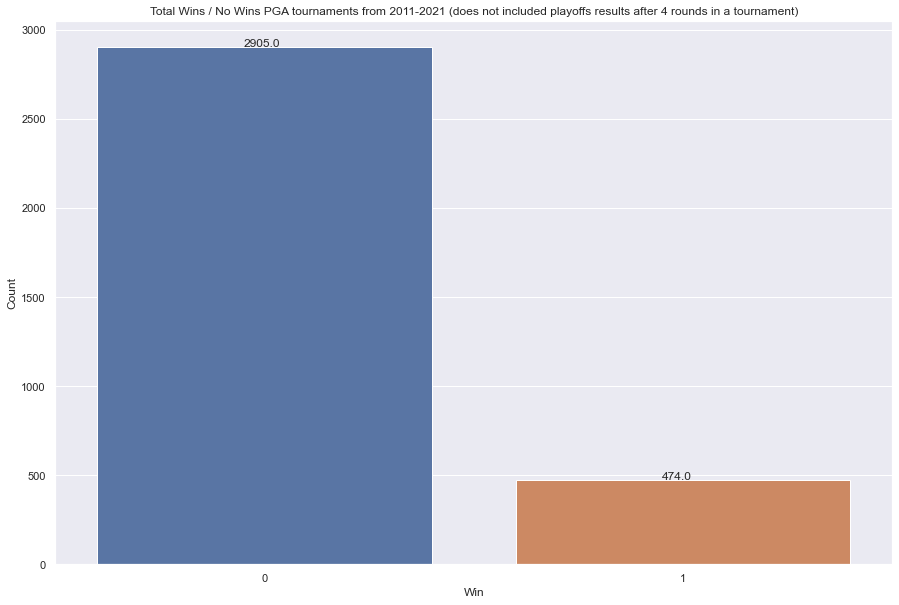

In [766]:
plt.figure(figsize=(15,10))
splot = sns.countplot(data=df_final, x = 'Win')
splot.set_xticklabels(['0', '1'])
plt.xlabel('Win')
plt.ylabel('Count')
plt.title('Total Wins / No Wins PGA tournaments from 2011-2021 (does not included playoffs results after 4 rounds in a tournament)')

for p in splot.patches:
   splot.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.05))

plt.show()

<p style='color:red;font-size:14px;font-weight: bold''>Observation:</p><p>The dependent variable: 'Win' is clearly imbalaced. it is
important to point out that in this analisis 'Win' means a player/players  ranked 1st after 4 rounds in a PGA
tournament. Therefore, the playoffs results when players ended up in a tie after final round are not included. In total, 
there were 831 unique players competed from 2011-2021, i.e, there were many who did compete several times during the
aforementioned period.<p>

<h4 style='color:red;font-size:20px'>Visualization of the variables</h4>

<h6 style='color:red;font-size:15px'>Correlation Matrix</h6>

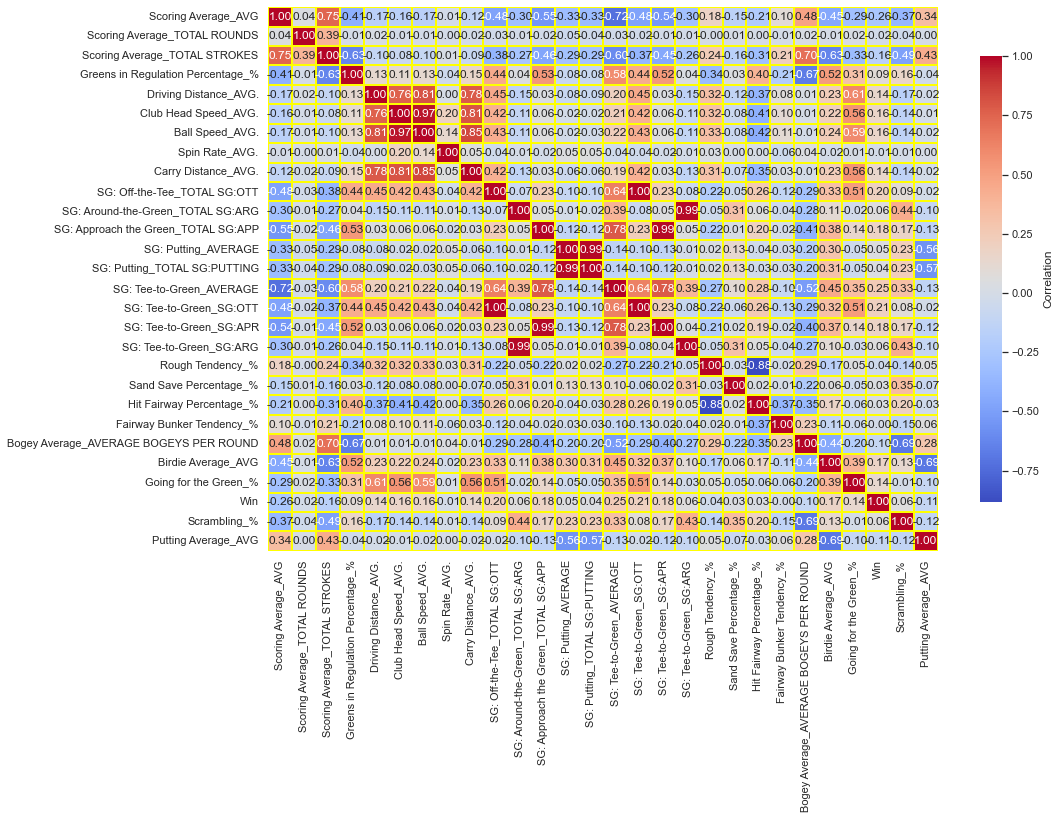

In [767]:
plt.figure(figsize=(15,10))
corr = df_final.drop(columns=['Year']).corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm',linewidths=2, linecolor='yellow',annot=True, fmt='.2f',  cbar_kws={"shrink": .82,'label': 'Correlation'})
plt.show()

<p style='color:red;font-size:14px;font-weight: bold''> Observation:</p><p> the following independent variables are 
highly positive correlated between each other: 'Club Head Speed_AVG.' and 'Ball Speed_AVG.', 'Carry Distance_AVG.' and 
'Ball Speed_AVG.,'SG: Around-the-Green_TOTAL SG:ARG' and 'SG: Tee-to-Green_SG:APR', 'SG: Off-the-Tee_TOTAL SG:OTT' and
'SG: Tee-to-Green_AVERAGE','SG: Approach the Green_TOTAL SG:APP' and 'SG: Tee-to-Green_SG:APR','SG: Off-the-Tee_TOTAL SG:OTT'
and 'SG: Tee-to-Green_SG:OTT','SG: Tee-to-Green_SG:ARG' and 'SG: Approach the Green_TOTAL SG:APP', 'SG: Around-the-Green_TOTAL SG:ARG '
and 'SG: Tee-to-Green_SG:APR'<p>

In [768]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3379 entries, 0 to 4121
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Scoring Average_AVG                     3379 non-null   float64
 1   Scoring Average_TOTAL ROUNDS            3379 non-null   float64
 2   Scoring Average_TOTAL STROKES           3379 non-null   float64
 3   Greens in Regulation Percentage_%       3379 non-null   float64
 4   Driving Distance_AVG.                   3379 non-null   float64
 5   Club Head Speed_AVG.                    3379 non-null   float64
 6   Ball Speed_AVG.                         3379 non-null   float64
 7   Spin Rate_AVG.                          3379 non-null   float64
 8   Carry Distance_AVG.                     3379 non-null   float64
 9   SG: Off-the-Tee_TOTAL SG:OTT            3379 non-null   float64
 10  SG: Around-the-Green_TOTAL SG:ARG       3379 non-null   floa

<h5 style='color:red;font-size:18px'>Visualization using Boxplot</h5>

Index(['Scoring Average_AVG', 'Scoring Average_TOTAL STROKES',
       'Greens in Regulation Percentage_%', 'Driving Distance_AVG.',
       'Club Head Speed_AVG.', 'Spin Rate_AVG.', 'Carry Distance_AVG.',
       'SG: Off-the-Tee_TOTAL SG:OTT', 'SG: Around-the-Green_TOTAL SG:ARG',
       'SG: Approach the Green_TOTAL SG:APP', 'SG: Putting_AVERAGE',
       'SG: Tee-to-Green_AVERAGE', 'Sand Save Percentage_%',
       'Hit Fairway Percentage_%', 'Fairway Bunker Tendency_%',
       'Bogey Average_AVERAGE BOGEYS PER ROUND', 'Birdie Average_AVG',
       'Going for the Green_%', 'Win', 'Scrambling_%', 'Putting Average_AVG'],
      dtype='object')


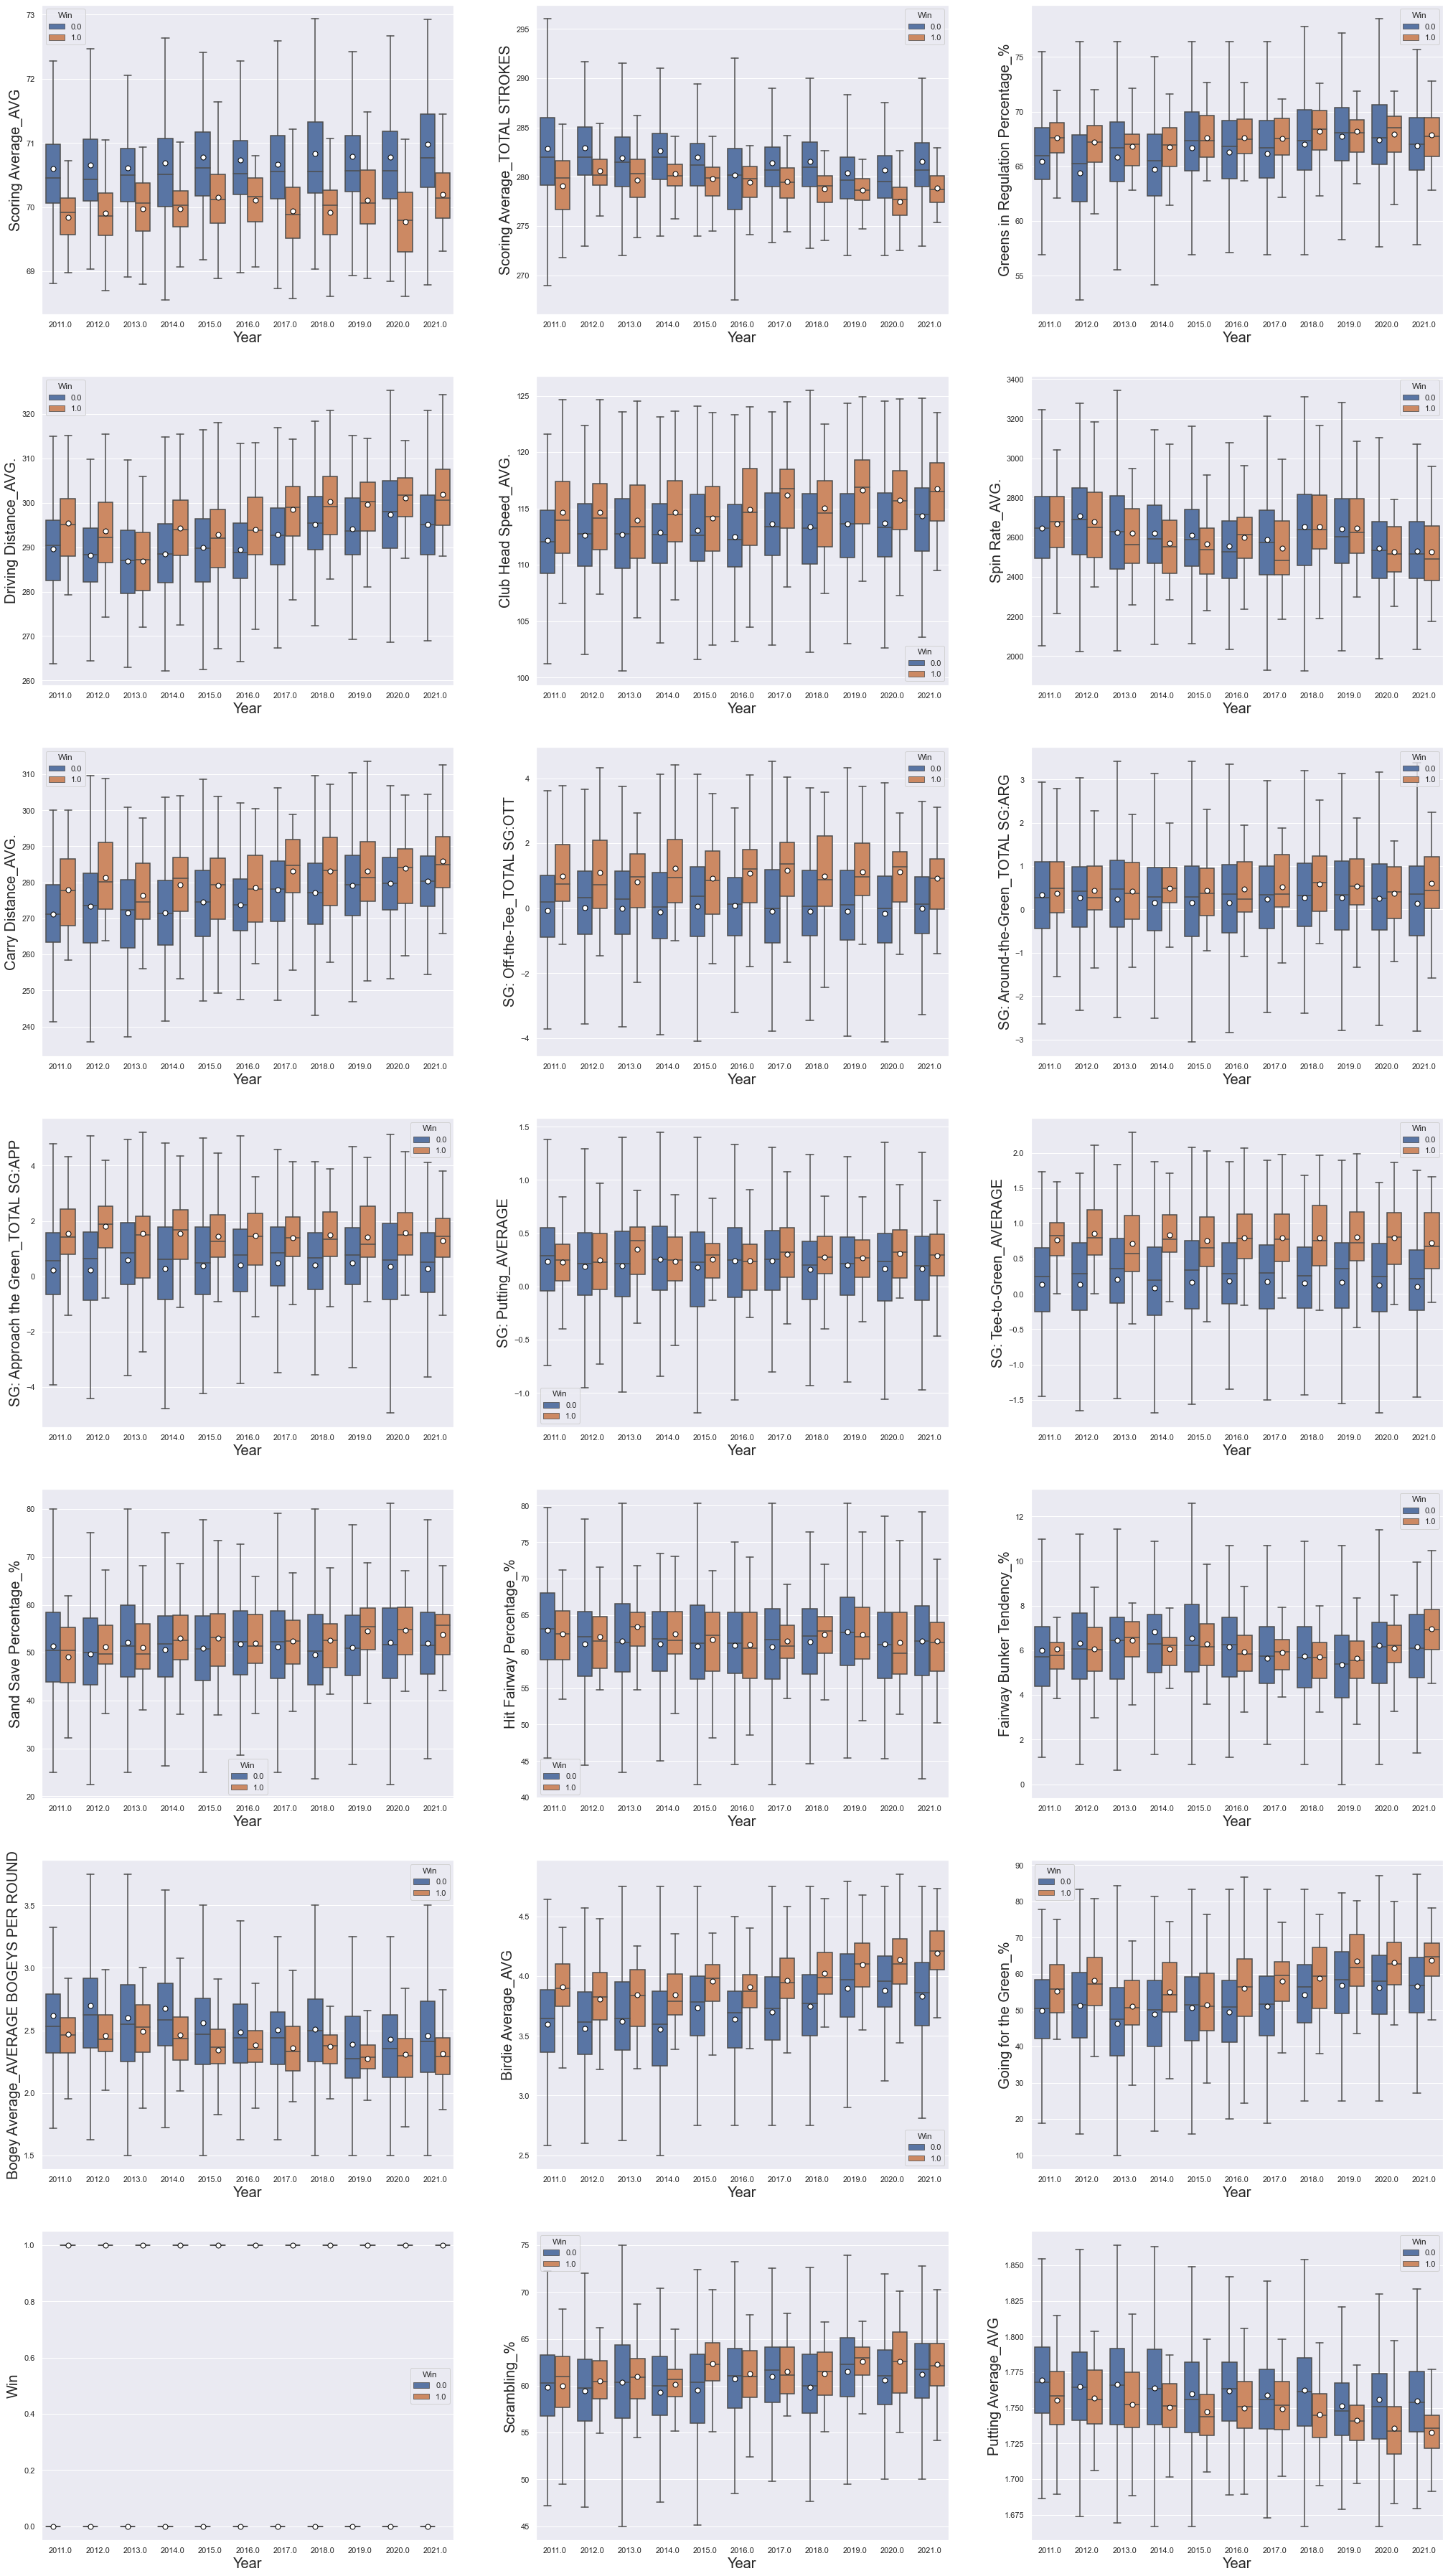

In [769]:
# Looking at the changes in statistics over time 

df_final2=df_final.drop(['Scoring Average_TOTAL ROUNDS','Ball Speed_AVG.','SG: Tee-to-Green_SG:OTT','SG: Tee-to-Green_SG:ARG','SG: Tee-to-Green_SG:APR',
           'SG: Putting_TOTAL SG:PUTTING','Rough Tendency_%'], axis = 1)

f, ax = plt.subplots(nrows = 7, ncols = 3, figsize=(35,65))
distribution =df_final2.loc[:,(df_final2.columns!='Wins')].columns
distribution = distribution[distribution != 'Year']

print(distribution)
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.boxplot(x = 'Year', y = column, hue='Win',data=df_final2, ax=ax[rows][cols], showfliers=False,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},)
    p.set_ylabel(column,fontsize=20)
    p.set_xlabel('Year',fontsize=20)
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

<h5 style='color:red;font-size:15px'> Observation</h5>

<p>A good understanding on the differences in statistics among the players who won and the ones who did not throughout the years (2011-2021) can be obtained using boxplots: independent variables vs. years, using the dependent variable: 'Win'  for colour encoding as seen on Figure 13. It can be seen that the players who won performed much better in all the categories/statistics, in particular the follow ones:  'Scoring Average_AVG', 'Driving Distance_AVG', '  Club Head Speed_AVG.', 'SG: Off-the-Tee_TOTAL SG:OTT', ' SG: Approach the Green_TOTAL SG:APP', SG: Tee-to-Green_AVERAGE', 'Putting Average", and "Scrambling %". An important observation is that the only two categories/statistics have greatly improved through the years: 'Driving Distance_AVG', and '  Club Head Speed_AVG.'. The major reasons behind it are : golf players are more athletic than ever, and equipment technology has dramatically improved through the years, specially the last 10 years.</p>

In [770]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3379 entries, 0 to 4121
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Scoring Average_AVG                     3379 non-null   float64
 1   Scoring Average_TOTAL STROKES           3379 non-null   float64
 2   Greens in Regulation Percentage_%       3379 non-null   float64
 3   Driving Distance_AVG.                   3379 non-null   float64
 4   Club Head Speed_AVG.                    3379 non-null   float64
 5   Spin Rate_AVG.                          3379 non-null   float64
 6   Carry Distance_AVG.                     3379 non-null   float64
 7   SG: Off-the-Tee_TOTAL SG:OTT            3379 non-null   float64
 8   SG: Around-the-Green_TOTAL SG:ARG       3379 non-null   float64
 9   SG: Approach the Green_TOTAL SG:APP     3379 non-null   float64
 10  SG: Putting_AVERAGE                     3379 non-null   floa

<h6 style='color:red;font-size:15px'> Values Distribution ofindependent variables used during the Modelling Phase</h6>

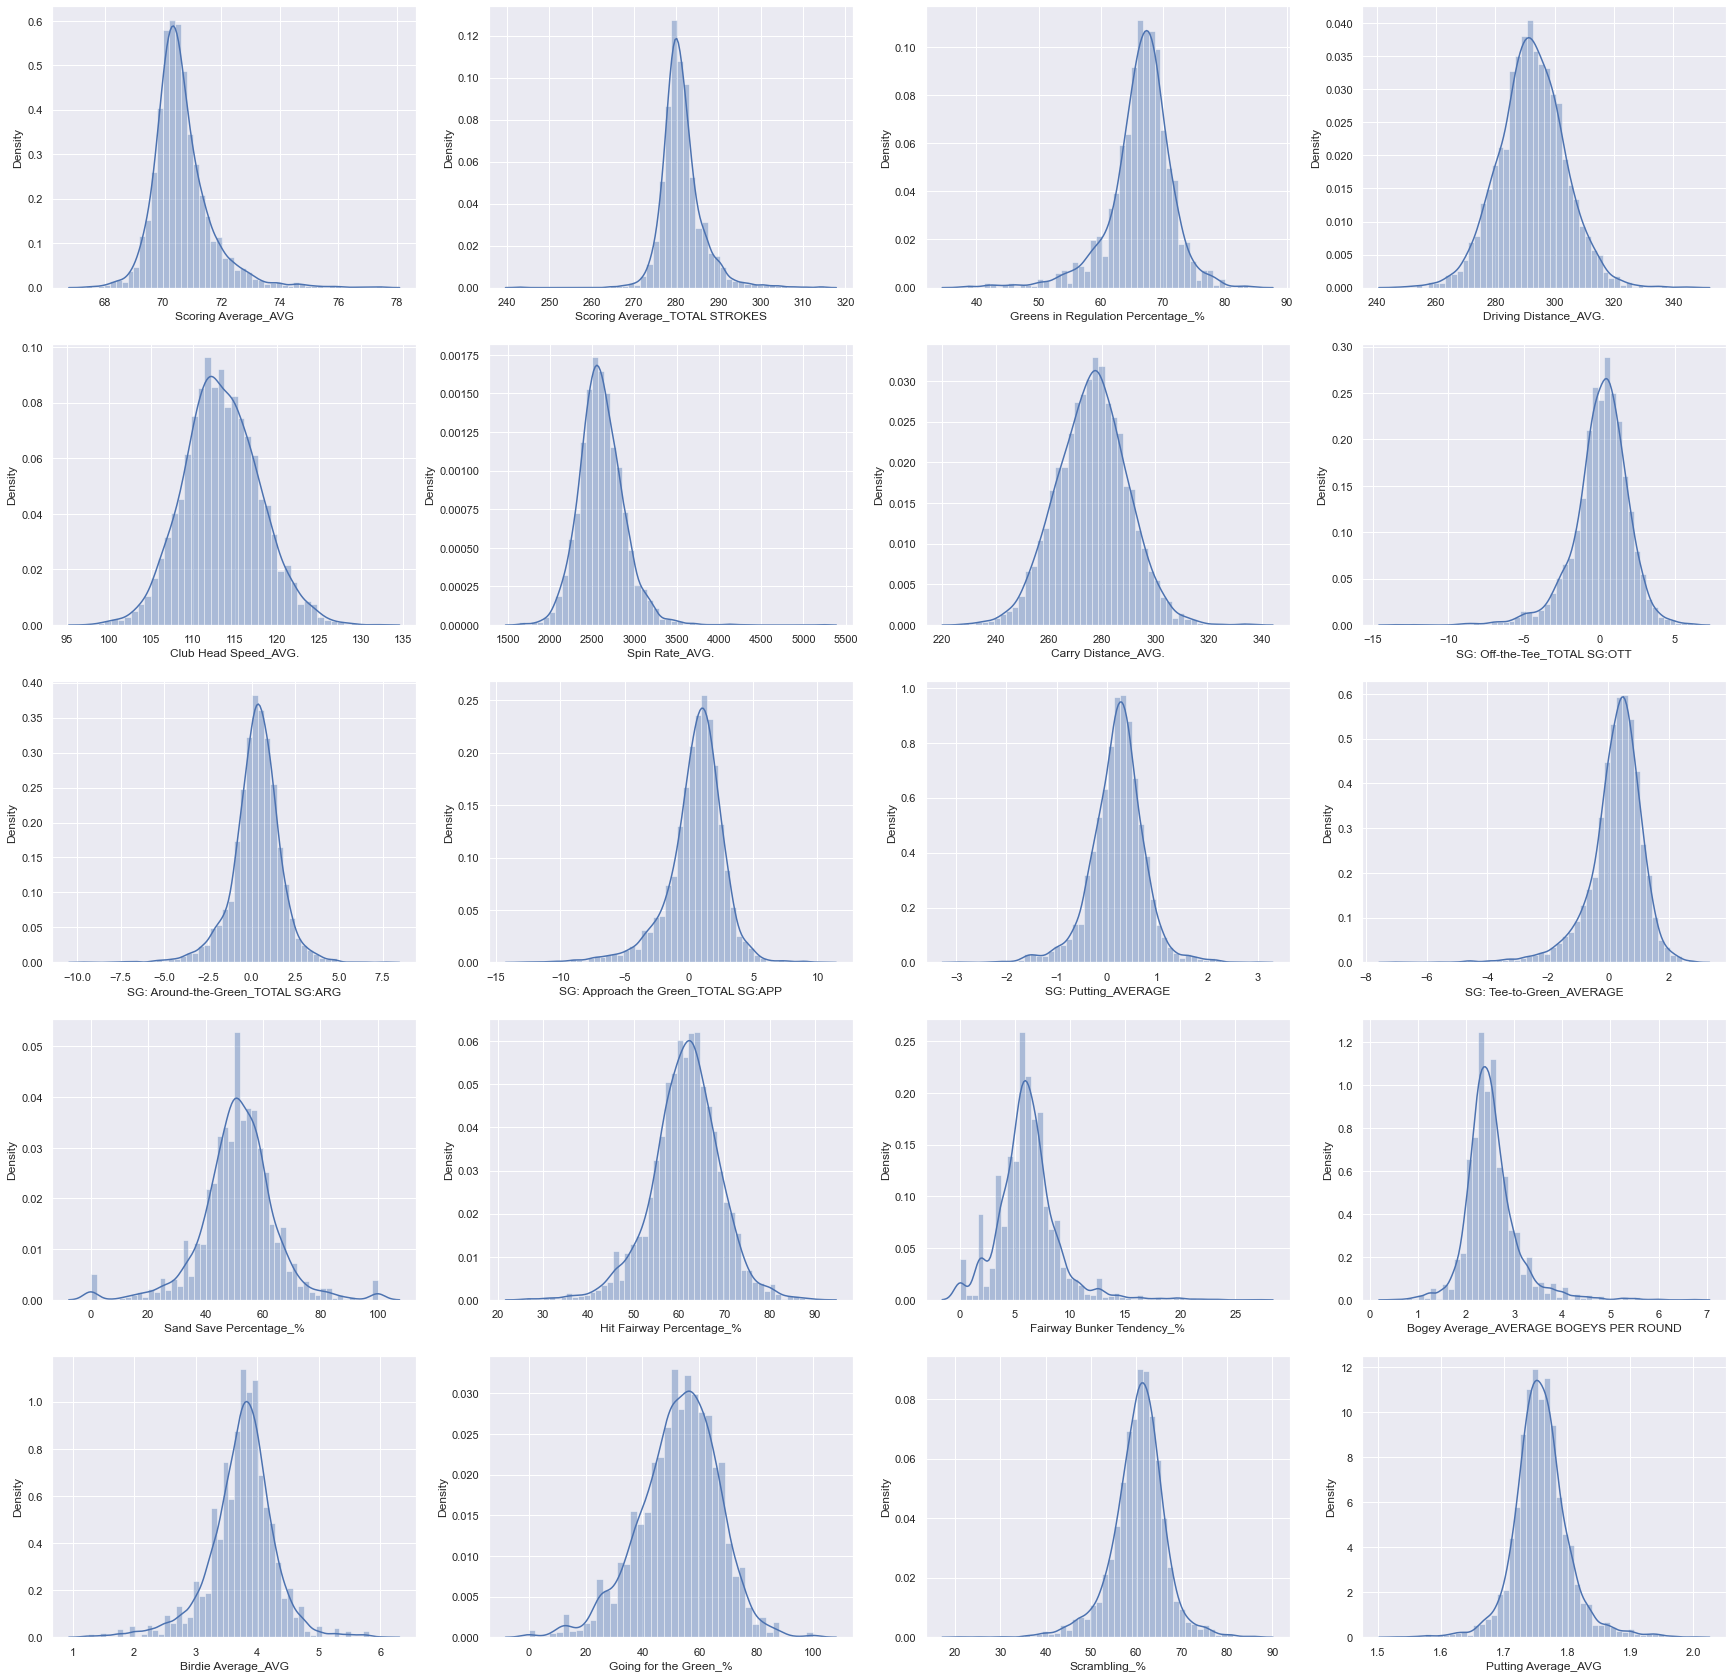

In [793]:
# distribution of the independent variables
f, ax = plt.subplots(nrows = 5, ncols = 4, figsize=(30,30))
distribution = df_final2.drop(columns=['Win','Year']).columns
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.distplot(df_final2[column], ax=ax[rows][cols])
    cols += 1
    if cols == 4:
        cols = 0
        rows += 1

<h5 style='color:red;font-size:15px'> Observation</h5>

<p>More insight into the dataset can be gained before finalizing the data preparation by showing the values distribution for all independent variables. As it can be observed, all of them show a quite nice normal distribution. Also, it is evident that there are no outliers present</p>

<h6 style='color:blue;font-size:18px'>Splitting the variables</h6>

In [773]:
X=df_final.drop(['Win','Year','Scoring Average_TOTAL ROUNDS','Ball Speed_AVG.','SG: Tee-to-Green_SG:OTT',
                 'SG: Tee-to-Green_SG:ARG','SG: Tee-to-Green_SG:APR','SG: Putting_TOTAL SG:PUTTING',
                 'Rough Tendency_%'], axis = 1)
y = df_final['Win']

<h6 style='color:blue;font-size:18px'>Cross-Validation</h6>

In [774]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, stratify = y)

<h4 style='color:red;font-size:18px'>Modelling</h4>
<p text-align-last="start">
Although, working with imbalance data is always a challenge for any particular Machine Learning Model,three models
were considered for the analysis: Logistic Regression, K-Nearest Neighbor, and Random Forest. The metric used to estimate the optimum parameters for the first two models was 'roc_auc', since it works quite well for 
imbalance data</p>

<h6 style='color:blue;font-size:18px'>Logistic Regression</h6>

In [4]:
pipeline_lgr=Pipeline([('scale', StandardScaler()), ('log', LogisticRegression(random_state=42, class_weight='w'))])
pipeline_lgr

Pipeline(steps=[('scale', StandardScaler()),
                ('log', LogisticRegression(class_weight='w', random_state=42))])

<h6 style='color:blue;font-size:15px'> Range of Hyperparameter alpha being tested</h6>

In [775]:
param_lgr = {'log__penalty':['l1','l2'],'log__C': np.logspace(-3,3,7),'log__solver':['newton-cg', 'lbfgs', 
                                                                                     'liblinear', 'sag', 'saga']}

In [777]:
roc_preds_grid_lgr=GridSearchCV(pipeline_lgr, param_grid=param_lgr,scoring='roc_auc',cv = 5)
roc_preds_grid_lgr.fit(X_train,y_train)


best_score_test_lgr=roc_preds_grid_lgr.score(X_test,y_test)
best_score_train_lgr=roc_preds_grid_lgr.score(X_train,y_train)
best_params_roc_preds_lgr=roc_preds_grid_lgr.best_params_

golf_train_preds = roc_preds_grid_lgr.predict(X_train)
golf_test_preds = roc_preds_grid_lgr.predict(X_test)
golf_train_mse = mean_squared_error(y_train,golf_train_preds)
golf_test_mse = mean_squared_error(y_test, golf_test_preds)

print(f'roc_auc train: {best_score_train_lgr: .3f}',f'roc_auc test: {best_score_test_lgr: .3f}')
print("Tuned Hyperparameters Logistic Regression :", best_params_roc_preds_lgr)

print(f'mse train: {golf_train_mse: .3f}',f'mse test: {golf_test_mse : .3f}')

n_splits_lgr  = roc_preds_grid_lgr.n_splits_ 
n_iter_lgr = pd.DataFrame(roc_preds_grid_lgr.cv_results_).shape[0]
mean_time_lgr=np.mean(roc_preds_grid_lgr.cv_results_['mean_fit_time'])
print(f'Elapsed Time using GridSearchCV: {mean_time_lgr* n_splits_lgr * n_iter_lgr: .3f}')

score_predict_lgr=precision_score(y_test,roc_preds_grid_lgr.predict(X_test))
score_recall_lgr=recall_score(y_test, roc_preds_grid_lgr.predict(X_test))
print(f'Precision Logistic Regression: {score_predict_lgr: .3f}',f'Recall Logistic Regression: {score_recall_lgr: .3f}')

roc_auc train:  0.797 roc_auc test:  0.726
Tuned Hyperparameters Logistic Regression : {'log__C': 1.0, 'log__penalty': 'l1', 'log__solver': 'saga'}
mse train:  0.134 mse test:  0.137
Elapsed Time using GridSearchCV:  9.166
Precision Logistic Regression:  0.571 Recall Logistic Regression:  0.101


<h6 style='color:blue;font-size:18px'>K-Nearest Neighbor</h6>

In [5]:
pipeline_knn=Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])
pipeline_knn

Pipeline(steps=[('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

<h6 style='color:blue;font-size:15px'> Range of Hyperparameter alpha being tested</h6>

In [779]:
param2_knn={'knn__n_neighbors':np.array(range(1,21,2)),'knn__weights' : ['uniform', 'distance'],'knn__p':[1,2]}

In [780]:
roc_preds_grid_knn=GridSearchCV(pipeline_knn, param_grid=param2_knn,scoring='roc_auc',cv = 5)
roc_preds_grid_knn.fit(X_train,y_train)


best_score_test_knn=roc_preds_grid_knn.score(X_test,y_test)
best_score_train_knn=roc_preds_grid_knn.score(X_train,y_train)
best_params_roc_preds_knn=roc_preds_grid_knn.best_params_

golf_train_preds_knn =roc_preds_grid_knn.predict(X_train)
golf_test_preds_knn = roc_preds_grid_knn.predict(X_test)
golf_train_mse_knn = mean_squared_error(y_train,golf_train_preds_knn)
golf_test_mse_knn = mean_squared_error(y_test, golf_test_preds_knn)


print(f'roc_auc train: {best_score_train_knn: .3f}',f'roc_auc test: {best_score_test_knn: .3f}')
print("Tuned Hyperparameters KNearestNeighborsClassifier:", best_params_roc_preds_knn)

print(f'mse train: {golf_train_mse_knn: .3f}',f'mse test: {golf_test_mse_knn : .3f}')

n_splits_knn  = roc_preds_grid_knn.n_splits_ 
n_iter_knn = pd.DataFrame(roc_preds_grid_knn.cv_results_).shape[0]
mean_time_knn=np.mean(roc_preds_grid_knn.cv_results_['mean_fit_time'])
print(f'Elapsed Time using GridSearchCV: {mean_time_knn * n_splits_knn * n_iter_knn: .3f}')

score_predict_knf=precision_score(y_test,roc_preds_grid_knn.predict(X_test))
score_recall_knf=recall_score(y_test, roc_preds_grid_knn.predict(X_test))
print(f'Precision KNeighborsClassifier: {score_predict_knf: .3f}',f'Recall KNeighborsClassifier: {score_recall_knf: .3f}')

roc_auc train:  1.000 roc_auc test:  0.751
Tuned Hyperparameters KNearestNeighborsClassifier: {'knn__n_neighbors': 19, 'knn__p': 2, 'knn__weights': 'distance'}
mse train:  0.000 mse test:  0.134
Elapsed Time using GridSearchCV:  1.337
Precision KNeighborsClassifier:  0.615 Recall KNeighborsClassifier:  0.134


<h6 style='color:blue;font-size:18px'>Random Forest</h6>

In [3]:
pipeline_rf=Pipeline([('scale', StandardScaler()), ('rf', RandomForestClassifier(random_state = 42,oob_score = True))])
pipeline_rf

Pipeline(steps=[('scale', StandardScaler()),
                ('rf',
                 RandomForestClassifier(oob_score=True, random_state=42))])

<h6 style='color:blue;font-size:15px'> Range of Hyperparameter alpha being tested</h6>

In [826]:
param2_rf={'rf__n_estimators':[1, 10, 100, 500],'rf__max_depth':[1, 2, 3, 4, 5,None],'rf__max_features':[2,5,10,15]}

In [827]:
roc_preds_grid_rf=GridSearchCV(pipeline_rf, param_grid=param2_rf,cv=5)
roc_preds_grid_rf.fit(X_train,y_train)


best_score_test_rf=roc_preds_grid_rf.score(X_test,y_test)
best_score_train_rf=roc_preds_grid_rf.score(X_train,y_train)
best_params_roc_preds_rf=roc_preds_grid_rf.best_params_

golf_train_preds_rf =roc_preds_grid_rf.predict(X_train)
golf_test_preds_rf = roc_preds_grid_rf.predict(X_test)
golf_train_mse_rf = mean_squared_error(y_train,golf_train_preds_rf)
golf_test_mse_rf = mean_squared_error(y_test, golf_test_preds_rf)


print(f'oob train: {best_score_train_rf: .3f}',f'oob test: {best_score_test_rf: .3f}')
print("Tuned Hyperparameters RandomForestClassifier:", best_params_roc_preds_rf)

print(f'mse train: {golf_train_mse_rf: .3f}',f'mse test: {golf_test_mse_rf : .3f}')

n_splits_rf  = roc_preds_grid_rf.n_splits_ 
n_iter_rf = pd.DataFrame(roc_preds_grid_rf.cv_results_).shape[0]
mean_time_rf=np.mean(roc_preds_grid_rf.cv_results_['mean_fit_time'])
print(f'Elapsed Time using GridSearchCV: {mean_time_rf * n_splits_rf * n_iter_rf: .3f}')

score_predict_rf=precision_score(y_test,roc_preds_grid_rf.predict(X_test))
score_recall_rf=recall_score(y_test, roc_preds_grid_rf.predict(X_test))
print(f'Precision  RandomForestClassifier: {score_predict_rf: .3f}',f'Recall  RandomForestClassifier: {score_recall_rf: .3f}')

oob train:  1.000 oob test:  0.867
Tuned Hyperparameters RandomForestClassifier: {'rf__max_depth': None, 'rf__max_features': 2, 'rf__n_estimators': 100}
mse train:  0.000 mse test:  0.133
Elapsed Time using GridSearchCV:  623.827
Precision  RandomForestClassifier:  0.621 Recall  RandomForestClassifier:  0.151


<h2 style="color:red;">Evaluation</h2>

<h3 style="color:blue;">Table: Metrics Summary, and Elapsed Times</h3>

In [848]:
def max_value_in_column(column):    

    highlight = 'background-color: yellow;'
    default = ''

    max_in_column = column.max()

    return [highlight if z == max_in_column else default for z in column] 

def min_value_in_column(column):    

    highlight = 'background-color: green;'
    default = ''

    min_in_column = column.min()

    return [highlight if z == min_in_column else default for z in column] 


heading_properties = [('font-size', '20px')]

cell_properties = [('font-size', '18px')]

df_1_style = [dict(selector="th", props=heading_properties),\
 dict(selector="td", props=cell_properties)]

In [850]:
data = {'model':['KNN','Logistic Regression','RandomForest'],'train score': [best_score_train_knn,best_score_train_lgr,best_score_train_rf],
        'test score': [best_score_test_knn,best_score_test_lgr,best_score_test_rf], 
        'average fit time':[mean_time_knn*n_splits_knn * n_iter_knn,mean_time_lgr*n_splits_lgr * n_iter_lgr,mean_time_rf*n_splits_rf * n_iter_rf],
       'recall score':[score_recall_knf,score_recall_lgr,score_recall_rf],'precision score':[score_predict_knf,score_predict_lgr,score_predict_rf],
    'MSE test':[golf_test_mse_knn,golf_test_mse,golf_test_mse_rf]}

results2_df = pd.DataFrame(data)
results2_df.head()
results2_df.style.set_table_styles(df_1_style).apply(max_value_in_column, subset=['test score','recall score','precision score'], axis=0).apply(min_value_in_column, subset=['MSE test','average fit time'], axis=0)

,model,train score,test score,average fit time,recall score,precision score,MSE test
0,KNN,1.000000,0.750723,1.337470,0.134454,0.615385,0.133728
1,Logistic Regression,0.797283,0.725606,9.166095,0.100840,0.571429,0.137278
2,RandomForest,1.000000,0.867456,623.826813,0.151261,0.620690,0.132544


<h6 style='color:blue;font-size:18px'>Confusion Matrix to visually analyze predicting behavior of the models tested</h6>

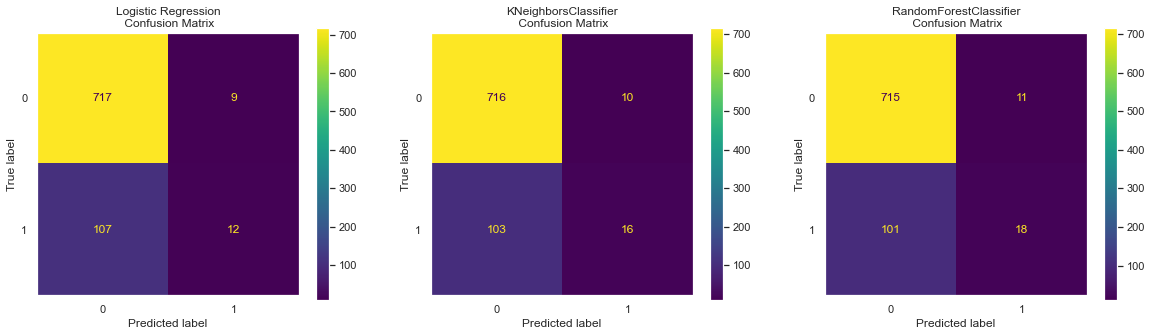

In [834]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ConfusionMatrixDisplay.from_predictions(y_test, roc_preds_grid_lgr.predict(X_test), display_labels = ['0', '1'], ax = ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, roc_preds_grid_knn.predict(X_test), display_labels = ['0', '1'], ax = ax[1])
ConfusionMatrixDisplay.from_predictions(y_test, roc_preds_grid_rf.predict(X_test), display_labels = ['0', '1'], ax = ax[2])
#ConfusionMatrixDisplay.from_predictions(y_test, tree_grid.predict(X_test), display_labels = ['0', '1'], ax = ax[2])
ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)
ax[0].set_title('Logistic Regression\n Confusion Matrix')
ax[1].set_title('KNeighborsClassifier\n Confusion Matrix')
ax[2].set_title('RandomForestClassifier\n Confusion Matrix')
#ax[2].set_title('Support Vector Machine\n Confusion Matrix')
plt.show()

<h6 style='color:blue;font-size:18px'>Precision-Recall Curve</h6>
<p> This type of curve works much better for moderate to large imbalanced data than the ROC-curve. This curve 
indicates that the best model is Random Forest model (green line) by relative slighlty margin over K-Nearest Neighbor model(purple lines).
</p>

y_score_knn = roc_preds_grid_knn.predict_proba(X_test)[:, 1]
y_score_lgr = roc_preds_grid_lgr.predict_proba(X_test)[:, 1]
y_score_rf = roc_preds_grid_rf.predict_proba(X_test)[:, 1]
#y_score_svc = precision_preds_grid_svc.predict_proba(X_test)[:, 1]
#y_score_tree = tree_grid.predict_proba(X_test)[:, 1]
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, y_score_knn)
precision_lgr, recall_lgr, thresholds_lgr = precision_recall_curve(y_test, y_score_lgr)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_score_rf)
#precision_svc, recall_svc, thresholds_svc = precision_recall_curve(y_test, y_score_svc)
#precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, y_score_tree)
fig, ax = plt.subplots()
ax.plot(recall_knn, precision_knn, color='purple',label='KNeighborsClassifier')
ax.plot(recall_lgr, precision_lgr, color='red',label='Logistic Regression')
ax.plot(recall_rf, precision_rf, color='green',label='RandomForestClassifier')
#ax.plot(recall_svc, precision_svc, color='blue',label='SVC')
#ax.plot(recall_tree, precision_tree, color='green',label='Decision Tree')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.legend(loc='best')

#display plot
plt.show()

<h5 style='color:blue;font-size:18px'>Using permutation_importance to rank the importance of independent variables by predicting the dependent variable 'Win'</h5>

In [837]:
r = permutation_importance(roc_preds_grid_rf,X_test, y_test,n_repeats=30,random_state=0)    
perm=pd.DataFrame({"Column":X.columns, "Importance":r.importances_mean}).sort_values(by = "Importance", ascending = False)

In [838]:
perm.query('Importance>0.000').style.set_table_styles(df_1_style).apply(max_value_in_column, subset=['Importance'], axis=0)

,Column,Importance
0,Scoring Average_AVG,0.007061
2,Greens in Regulation Percentage_%,0.005325
10,SG: Putting_AVERAGE,0.004694
8,SG: Around-the-Green_TOTAL SG:ARG,0.004221
11,SG: Tee-to-Green_AVERAGE,0.004063
19,Putting Average_AVG,0.003590
9,SG: Approach the Green_TOTAL SG:APP,0.003195
15,Bogey Average_AVERAGE BOGEYS PER ROUND,0.003116
16,Birdie Average_AVG,0.003077
12,Sand Save Percentage_%,0.002959


<h2 style="color:red;">Main Conclusions & Recomendations<h2>

<p>1. The final dataset, after cleaning (there was not need to remove outliers), dropping unnecessary columns consists of 22 columns and 3256 rows. The target columns was "Win" which stands:  Win in a PGA tournament during the period 2011-2021</p>
<p>2. it is thougth that the best classification model is the K-Nearest Neighbor, because it ranked the most widely known important player's statistics among the top five to win a PGA golf tournament. Also,the importance value is
more evenly distribute among those top five, which make sense.However, all models performed relative poorly in the recall score.</p>
<p> 3. The metric used to estimate the optimum parameters for each model was 'roc_auc' for the Logistic Regression, and K-Nearest Neighbor, since it works quite well for imbalance data </p>
<p> 4. The precision-recall curve was chosen also as a indicator, since works much better for moderate to large imbalanced data than the ROC-curve, which is the case for the dataset used in this analysis.</p>
<p> 5. The most important independent variable was: 'Scoring Average_AVG'  in all models tested. However, it is interesting that this variable is much more important in the Logistic Regression Model</p>
<p> 6. The independent variables: 'Driving Distance_AVG' is not within the five most important ones,i.e., indicating that  driving the ball longer do not guarantee  that a player will win a tournament. This is a pretty interesting observation that sometimes is overlooked by people who want to initiate their career in golf.</p>
<p> 7. Consistency, i.e, shooting low score, and course management (off the tee,around the green, scrambling,etc) seem to be the most important aspects to win PGA golf tournaments.
<p> 8.The Random Forest model was tested to explore the possibility of improving the values obtained for the metrics,in particular the Recall Score. However, the improvement obtained was not as good as expected.